<a href="https://colab.research.google.com/github/itspallavi20/Oral_Diseases_Prediction/blob/main/Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/Oral_Diseases_Project/Dataset/Train'
val_dir = '/content/drive/MyDrive/Oral_Diseases_Project/Dataset/Validation'

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(6, activation='softmax')  # Assuming 6 classes in your dataset
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Found 1504 images belonging to 6 classes.
Found 300 images belonging to 6 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 893s 17s/step - accuracy: 0.3951 - loss: 1.5111 - val_accuracy: 0.4792 - val_loss: 1.3977
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5833 - val_loss: 1.2119
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 386s 7s/step - accuracy: 0.4369 - loss: 1.3542 - val_accuracy: 0.5278 - val_loss: 1.3440
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 567ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.2896
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 353s 7s/step - accuracy: 0.5465 - loss: 1.2444 - val_accuracy: 0.4965 - val_loss: 1.3855
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5833 - val_loss: 1.1753
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 376s 7s/step - accuracy: 0.5946 - loss: 1.1701 - val_accuracy: 0.3993 - val_loss: 1.4012
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 539ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 1.5126
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 371s 8s/step - accuracy: 0.6203 - loss: 1.1494 -

In [ ]:
import numpy as np
train_accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
train_loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

Training Accuracy: 0.2665
Validation Accuracy: 0.4500
Training Loss: 0.6292
Validation Loss: 1.3542


9/9 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step
Confusion Matrix:
[[  0   0  18   3   2   0]
 [  0   0  13   2   3   0]
 [  0   0  39   9   9   0]
 [  0   0 103  29  21   0]
 [  0   0  22   4   4   0]
 [  0   0   3   3   1   0]]

Class-wise TP, TN, FP, FN values:
Class Calculus:
  True Positives (TP): 0
  True Negatives (TN): 265
  False Positives (FP): 0
  False Negatives (FN): 23
Class Data Caries:
  True Positives (TP): 0
  True Negatives (TN): 270
  False Positives (FP): 0
  False Negatives (FN): 18
Class Gingivitis:
  True Positives (TP): 39
  True Negatives (TN): 72
  False Positives (FP): 159
  False Negatives (FN): 18
Class Hypodontia:
  True Positives (TP): 29
  True Negatives (TN): 114
  False Positives (FP): 21
  False Negatives (FN): 124
Class Mouth Ulcer:
  True Positives (TP): 4
  True Negatives (TN): 222
  False Positives (FP): 36
  False Negatives (FN): 26
Class Tooth Discoloration:
  True Positives (TP): 0
  True Negatives (TN): 281
  False Positives (FP): 0
  False Negatives (FN

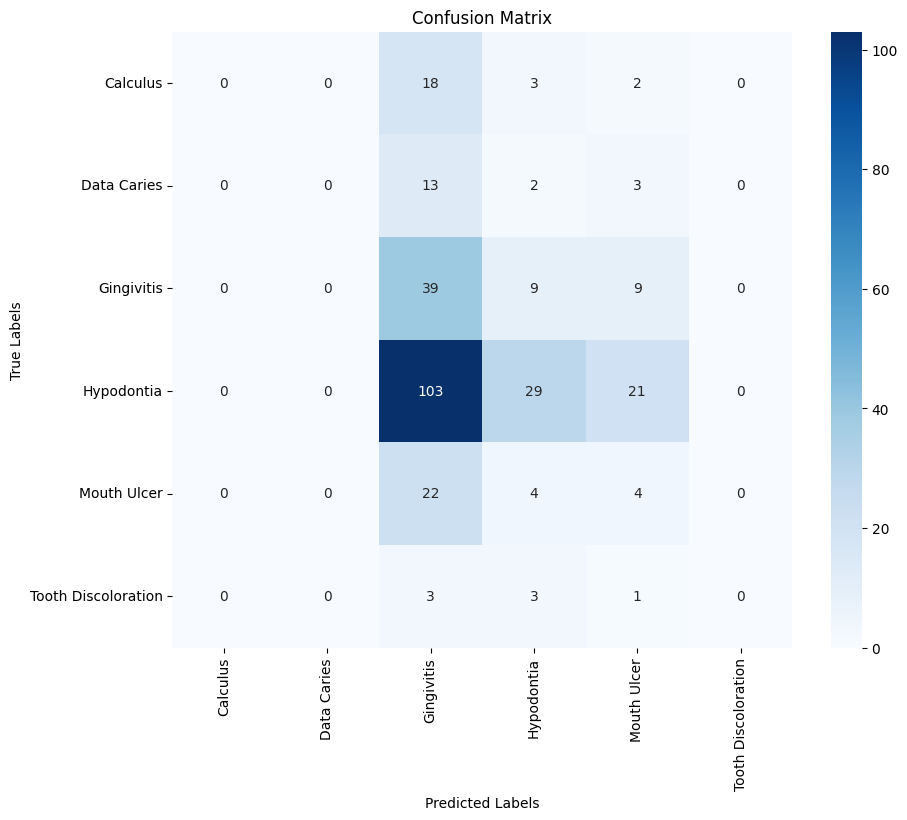


Classification Report:
                     precision    recall  f1-score   support

           Calculus       0.00      0.00      0.00        23
        Data Caries       0.00      0.00      0.00        18
         Gingivitis       0.20      0.68      0.31        57
         Hypodontia       0.58      0.19      0.29       153
        Mouth Ulcer       0.10      0.13      0.11        30
Tooth Discoloration       0.00      0.00      0.00         7

           accuracy                           0.25       288
          macro avg       0.15      0.17      0.12       288
       weighted avg       0.36      0.25      0.22       288



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
predictions = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes[:len(predicted_classes)]

conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

class_labels = list(val_generator.class_indices.keys())
print("\nClass-wise TP, TN, FP, FN values:")
for i, class_label in enumerate(class_labels):
    tp = conf_matrix[i, i]
    fn = np.sum(conf_matrix[i, :]) - tp
    fp = np.sum(conf_matrix[:, i]) - tp
    tn = np.sum(conf_matrix) - (tp + fn + fp)

    print(f"Class {class_label}:")
    print(f"  True Positives (TP): {tp}")
    print(f"  True Negatives (TN): {tn}")
    print(f"  False Positives (FP): {fp}")
    print(f"  False Negatives (FN): {fn}")

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("\nClassification Report:")
print(report)